In [132]:
import os
import random
import pickle
import networkx as nx
import math

In [133]:
def load_random_graph(graphs_folder):
    graph_files = [f for f in os.listdir(graphs_folder) if f.endswith('.pkl')]
    random_graph_file = random.choice(graph_files)
    with open(os.path.join(graphs_folder, random_graph_file), 'rb') as f:
        G = pickle.load(f)
    return G, random_graph_file

# Putanja do foldera sa grafovima
graphs_folder = 'grafovi'

# Učitavanje grafa
G_global, graph_file_name = load_random_graph(graphs_folder)
# G_info = nx.info(G)
num_nodes = G_global.number_of_nodes()

# G_info, num_nodes, graph_file_name
num_nodes, graph_file_name

(85, 'graf_2.pkl')

In [134]:
def solution_quality(solution):
    return len(solution.nodes())

In [135]:
def initialize_solution(G, k):
    while True:
        potential_solution = G.copy()
        nodes_to_remove = random.sample(potential_solution.nodes(), k)
        potential_solution.remove_nodes_from(nodes_to_remove)
        if is_k_connected(potential_solution, k):
            return potential_solution

In [136]:
def local_search(G, k, current_solution):
    # This function should reduce the number of nodes in the solution if possible
    # It checks if any node can be removed while still keeping the solution k-connected
    print("Number of nodes at the entry of local_search()")
    print(current_solution.number_of_nodes())
    
    temp_solution = current_solution.copy()
    nodes = list(current_solution.nodes())
    random.shuffle(nodes)
    
    for node in nodes:
        temp_solution.remove_node(node)
        if not is_k_connected(temp_solution, k):
            temp_solution.add_node(node)
    
    # Create a subgraph containing only the nodes and edges from the original graph
    temp_solution = G.subgraph(temp_solution.nodes())
    
    print("Number of nodes at the exit of local_search()")
    print(temp_solution.number_of_nodes())
    print("Number of edges at the exit of local_search()")
    print(temp_solution.number_of_edges())
    
    return temp_solution


In [137]:
def is_k_connected(G, k):
    if G.number_of_nodes() < k:
        return False
    else:
        return nx.node_connectivity(G) >= k


In [138]:
def shaking(G, k, current_solution):
    modified_solution = current_solution.copy()
    print("Edges before shaking:", len(modified_solution.edges()))

    if random.choice([True, False]):
        # Remove randomly selected nodes, but not less than k
        potential_nodes_to_remove = list(modified_solution.nodes())
        # Calculate weights based on the number of neighbors
        weights_to_remove = [G.degree(node) for node in potential_nodes_to_remove]
        # Ensure k is not greater than the number of potential nodes to remove
        k = min(k, len(potential_nodes_to_remove))
        # Choose nodes to remove based on weights
        nodes_to_remove = random.choices(potential_nodes_to_remove, weights=weights_to_remove, k=k)
        modified_solution.remove_nodes_from(nodes_to_remove)
    else:
        # Add randomly selected nodes from the original graph
        potential_nodes = list(set(G.nodes()) - set(modified_solution.nodes()))
        # Calculate weights based on the number of neighbors
        weights = [G.degree(node) for node in potential_nodes]
        
        # Ensure there are nodes available to add
        if potential_nodes:
            # Choose nodes to add based on weights
            nodes_to_add = random.choices(potential_nodes, weights=weights, k=math.floor(len(potential_nodes)/2))
            modified_solution.add_nodes_from(nodes_to_add)
            
            # Add corresponding edges
            for node in nodes_to_add:
                for neighbor in G.neighbors(node):
                    # Ensure that the edge is added only if the neighbor is already in the modified solution
                    if neighbor in modified_solution.nodes():
                        modified_solution.add_edge(node, neighbor)

    # Ensure the solution remains k-connected
    print("Edges after shaking:", len(modified_solution.edges()))
    print(f'shaking: number of nodes before removing nodes with less than k neighbors: {modified_solution.number_of_nodes()}')
    modified_solution = remove_nodes_with_less_than_k_neighbors_optimized(modified_solution, k)
    print(f'shaking: number of nodes after removing nodes with less than k neighbors: {modified_solution.number_of_nodes()}')
    
    if is_k_connected(modified_solution, k):
        print("shaking: modified solution is acceptable")
        return modified_solution
    else:
        print("shaking: modified solution is not acceptable")
        return current_solution


In [139]:
def remove_nodes_with_less_than_k_neighbors_optimized(G, k):
    changed = True
    while changed:
        changed = False
        nodes_to_remove = [node for node in G.nodes if G.degree(node) < k]
        if nodes_to_remove:
            G.remove_nodes_from(nodes_to_remove)
            changed = True
    return G

In [140]:
from time import perf_counter
import matplotlib.pyplot as plt

In [141]:
def vns_algorithm(G, k, max_iter=5):
    # Inicijalizacija
    # current_solution = initialize_solution(G, k)
    # print(current_solution.number_of_nodes())
    start_time = perf_counter()
    G = remove_nodes_with_less_than_k_neighbors_optimized(G, k)
    nx.draw(G,with_labels=True, font_weight='bold')
    plt.show()
    best_solution = G.copy()
    print(f'vns_algorithm: broj cvorova na pocetku: {G.number_of_nodes()}')
    while perf_counter() - start_time < 15:
        # Shaking
        shaken_solution = shaking(G, k, best_solution)
        
        # Local search
        new_solution = local_search(G, k, shaken_solution)
      #  nx.draw(new_solution,with_labels=True, font_weight='bold')
        # Ažuriranje trenutnog rešenja ako je novo rešenje bolje
        if solution_quality(new_solution) < solution_quality(best_solution):
            best_solution = new_solution.copy()
            print(f'vns_algorithm: nadjeno je novo najbolje resenje: {best_solution.number_of_nodes()}')
    
    return best_solution

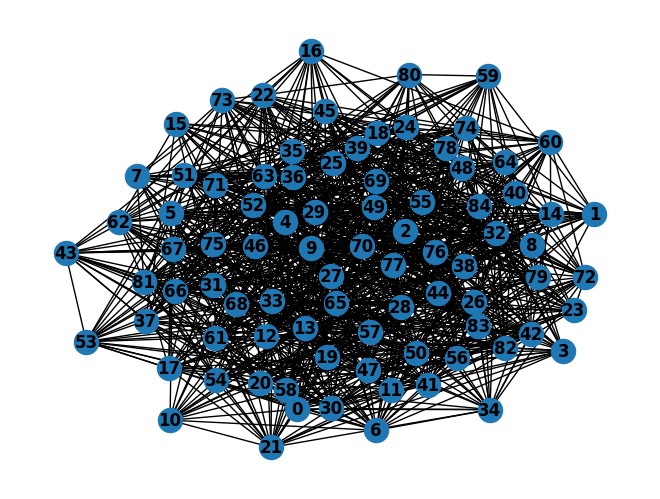

vns_algorithm: broj cvorova na pocetku: 85
Edges before shaking: 1044
Edges after shaking: 1044
shaking: number of nodes before removing nodes with less than k neighbors: 85
shaking: number of nodes after removing nodes with less than k neighbors: 85
shaking: modified solution is acceptable
Number of nodes at the entry of local_search()
85
Number of nodes at the exit of local_search()
29
Number of edges at the exit of local_search()
125
vns_algorithm: nadjeno je novo najbolje resenje: 29
Edges before shaking: 125
Edges after shaking: 98
shaking: number of nodes before removing nodes with less than k neighbors: 25
shaking: number of nodes after removing nodes with less than k neighbors: 24
shaking: modified solution is acceptable
Number of nodes at the entry of local_search()
24
Number of nodes at the exit of local_search()
22
Number of edges at the exit of local_search()
79
vns_algorithm: nadjeno je novo najbolje resenje: 22
Edges before shaking: 79
Edges after shaking: 59
shaking: num

Number of nodes at the exit of local_search()
30
Number of edges at the exit of local_search()
145
Edges before shaking: 55
Edges after shaking: 318
shaking: number of nodes before removing nodes with less than k neighbors: 46
shaking: number of nodes after removing nodes with less than k neighbors: 46
shaking: modified solution is acceptable
Number of nodes at the entry of local_search()
46
Number of nodes at the exit of local_search()
28
Number of edges at the exit of local_search()
114
Edges before shaking: 55
Edges after shaking: 262
shaking: number of nodes before removing nodes with less than k neighbors: 43
shaking: number of nodes after removing nodes with less than k neighbors: 43
shaking: modified solution is acceptable
Number of nodes at the entry of local_search()
43
Number of nodes at the exit of local_search()
41
Number of edges at the exit of local_search()
238
Edges before shaking: 55
Edges after shaking: 309
shaking: number of nodes before removing nodes with less than

In [142]:
final_solution = vns_algorithm(G_global, 5, 10)
print("Broj cvorova poslednjeg grafa")
print(final_solution.number_of_nodes())



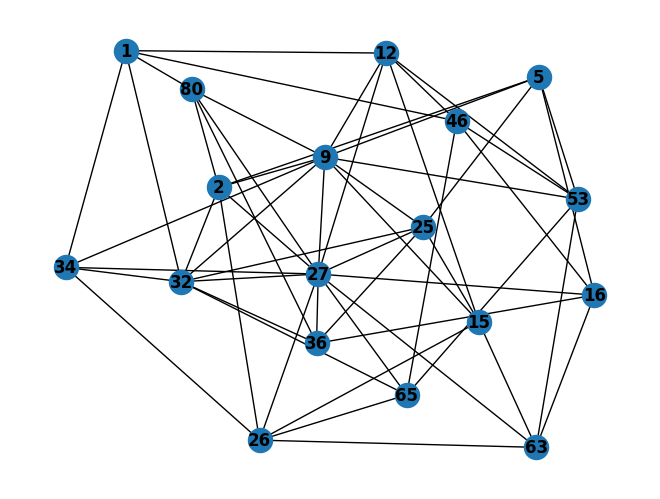

In [143]:

nx.draw(final_solution,with_labels=True, font_weight='bold')
plt.show()

In [57]:
print(final_solution.number_of_edges())

0


In [43]:
from itertools import combinations

def brute_force_algorithm(G, k):
    all_nodes = list(G.nodes())
    n = len(all_nodes)
    best_solution = None
    best_size = float('inf')

    # Provera svih mogućih kombinacija čvorova
    for r in range(n, k-1, -1):
        for nodes in combinations(all_nodes, r):
            subgraph = G.subgraph(nodes)
            if nx.is_k_edge_connected(subgraph, k):
                if r < best_size:
                    best_solution = subgraph
                    best_size = r

    return best_solution